In this project, we'll practice the machine learning workflow in predicting a car's market price using its attributes.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
cars = pd.read_csv('imports-85.data', header=None)

In [3]:
cars.columns = ['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration', 'num_doors','body_style', 'drive_wheels', 'engine_location', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type', 'num_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']

In [4]:
cars.head(5)

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [5]:
cars.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized_losses    205 non-null object
make                 205 non-null object
fuel_type            205 non-null object
aspiration           205 non-null object
num_doors            205 non-null object
body_style           205 non-null object
drive_wheels         205 non-null object
engine_location      205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_type          205 non-null object
num_cylinders        205 non-null object
engine_size          205 non-null int64
fuel_system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression_ratio    205 non-null float64
horsepower           205 non-nul

From above, `symboling`, `wheel_base`, `length`, `width`, `height`, `curb_weight`, `engine_size`, `compression_ratio`, `city_mpg`, and `highway_mpg` are numeric features and the `price` column is our target column, which in its current form appears to be a string object and will need to be converted to a numeric data type for future analysis. 

In [6]:
cars['price'].iloc[0]

'13495'

In [7]:
continuous_vals = ['symboling', 'normalized_losses', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price' ]

In [8]:
cars = cars[continuous_vals]

In [9]:
cars.head(2)

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500


**Data Cleaning**

In [10]:
cars['normalized_losses'].value_counts()

?      41
161    11
91      8
150     7
134     6
104     6
128     6
168     5
94      5
103     5
65      5
102     5
85      5
74      5
95      5
122     4
148     4
93      4
106     4
118     4
101     3
115     3
83      3
125     3
137     3
154     3
153     2
87      2
197     2
113     2
158     2
110     2
192     2
81      2
194     2
145     2
89      2
108     2
119     2
129     2
164     2
188     2
142     1
98      1
77      1
231     1
256     1
121     1
90      1
78      1
186     1
107     1
Name: normalized_losses, dtype: int64

From above, it looks like the `normalized_losses` column contains 41 missing values and that a missing value is encoded as a '?' in the dataset

We are going to replace all '?' in the dataset with `np.nan` and then take a look at how many missing values we are dealing with after doing this.

In [11]:
cars = cars.replace('?', np.nan)

In [12]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 16 columns):
symboling            205 non-null int64
normalized_losses    164 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_size          205 non-null int64
bore                 201 non-null object
stroke               201 non-null object
compression_ratio    205 non-null float64
horsepower           203 non-null object
peak_rpm             203 non-null object
city_mpg             205 non-null int64
highway_mpg          205 non-null int64
price                201 non-null object
dtypes: float64(5), int64(5), object(6)
memory usage: 25.7+ KB


Let's go ahead and also convert the non-null values to numeric data types now

In [13]:
cars = cars.astype('float64')

Since `price` is what we want to predict, we'll go ahead and remove all rows with a null price

In [14]:
cars = cars.dropna(subset=['price'])

In [15]:
cars.isnull().sum()

symboling             0
normalized_losses    37
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_size           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 0
dtype: int64

We'll go ahead and replace missing values in other columns with the column means

In [16]:
cars = cars.fillna(cars.mean())

Let's go ahead and normalize the remaining columns with the exception of the target column

In [17]:
normalized_cars = (cars - cars.min())/(cars.max() - cars.min())
normalized_cars['price'] = cars['price']

In [18]:
normalized_cars.head(5)

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,1.0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,1.0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.6,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.8,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.8,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


**Univariate K Nearest Neighbors Model**

In [19]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

The function below encapsulates the training and simple validation process. The function has three parameters: the dataframe object, the training column name and the target column name and returns the root mean squared error after fitting a univariate K Nearest Neighbors model to the data using a 75-25 train-test split

In [20]:
def knn_train_test(df, train_col_name, target_col_name):
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    num_train_samples = int(0.75*rand_df.shape[0])
    train_df = rand_df.iloc[:num_train_samples]
    test_df = rand_df.iloc[num_train_samples:]
    model = KNeighborsRegressor()
    model.fit(train_df[[train_col_name]], train_df[target_col_name])
    preds = model.predict(test_df[[train_col_name]])
    return np.sqrt(mean_squared_error(preds, test_df[target_col_name]))
    

Let's try training the simple model on each of the feature columns to see which performs the best

In [21]:
feature_cols = ['symboling', 'normalized_losses', 'wheel_base', 'length', 'width',
       'height', 'curb_weight', 'engine_size', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg']

In [22]:
for col in feature_cols:
    rmse = knn_train_test(normalized_cars, col, 'price')
    print('Using feature ' + col + ' yields an RMSE value of ', rmse)

Using feature symboling yields an RMSE value of  11034.058933726119
Using feature normalized_losses yields an RMSE value of  6231.311123986794
Using feature wheel_base yields an RMSE value of  4161.947971897813
Using feature length yields an RMSE value of  5416.294063685402
Using feature width yields an RMSE value of  3917.2276702270137
Using feature height yields an RMSE value of  6666.667677627373
Using feature curb_weight yields an RMSE value of  4011.4500359082417
Using feature engine_size yields an RMSE value of  3051.4342223507515
Using feature bore yields an RMSE value of  6507.421953431328
Using feature stroke yields an RMSE value of  6939.6914399959405
Using feature compression_ratio yields an RMSE value of  5958.572328216569
Using feature horsepower yields an RMSE value of  4756.983755346181
Using feature peak_rpm yields an RMSE value of  6326.47174389284
Using feature city_mpg yields an RMSE value of  3684.803553760217
Using feature highway_mpg yields an RMSE value of  4323.

Let's modify `knn_train_test()` to accept a parameter for the number of neighbors `k` for the univariate model to train on

In [23]:
def knn_train_test(df, train_col_name, target_col_name, k):
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    num_train_samples = int(0.75*rand_df.shape[0])
    train_df = rand_df.iloc[:num_train_samples]
    test_df = rand_df.iloc[num_train_samples:]
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(train_df[[train_col_name]], train_df[target_col_name])
    preds = model.predict(test_df[[train_col_name]])
    return np.sqrt(mean_squared_error(preds, test_df[target_col_name]))

In [24]:
k_values = [1,3,5,7,9]
univariate_knn = dict()

for col in feature_cols:
    for k in k_values:
        rmse = knn_train_test(normalized_cars, col, 'price', k)
        if k == 1:
            univariate_knn[col] = [rmse]
        else:
            univariate_knn[col].append(rmse)
      

The `univariate_knn` dictionary holds the rmse values for each feature column in the `normalized_cars` dataframe trained using each k value of 1,3,5,7, and 9

In [25]:
import matplotlib.pyplot as plt 

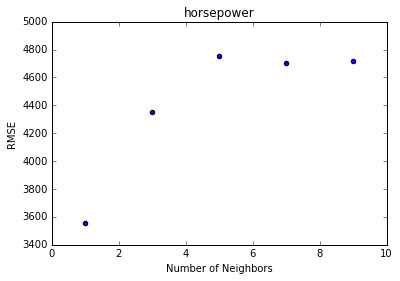

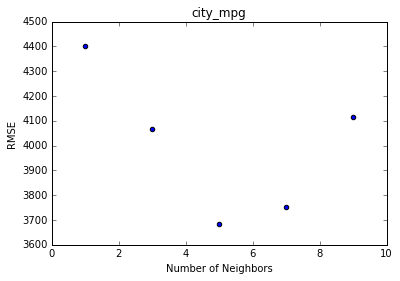

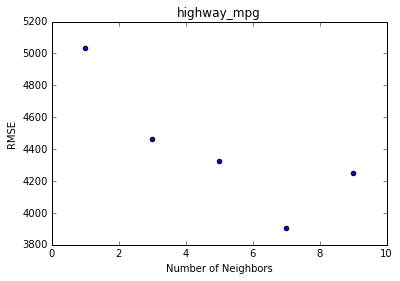

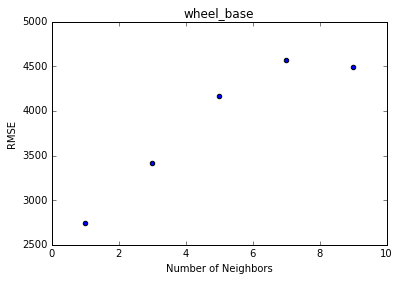

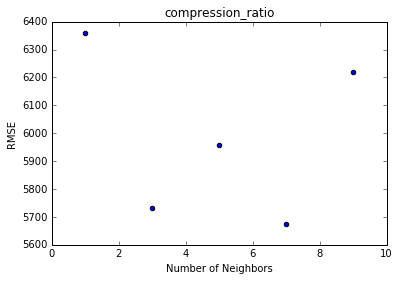

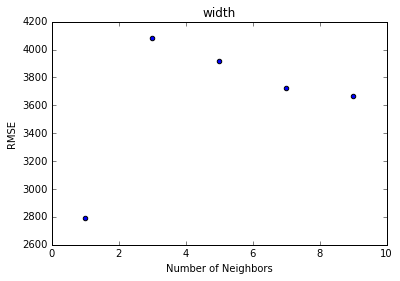

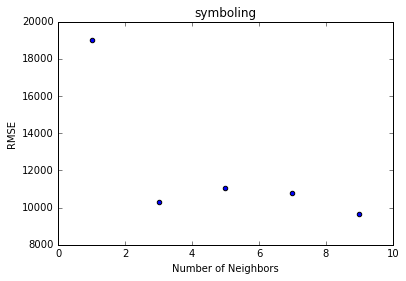

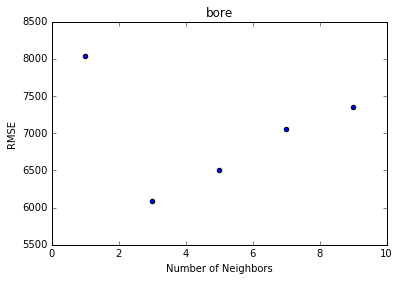

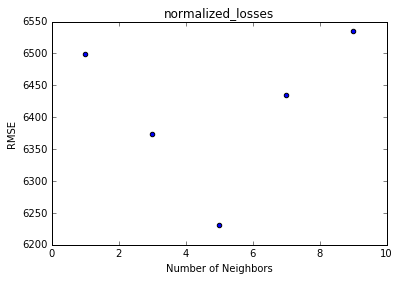

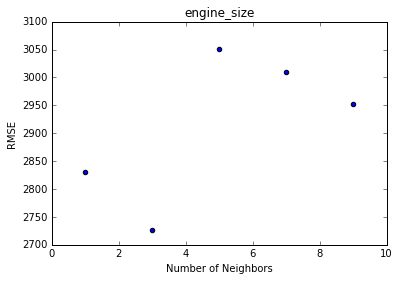

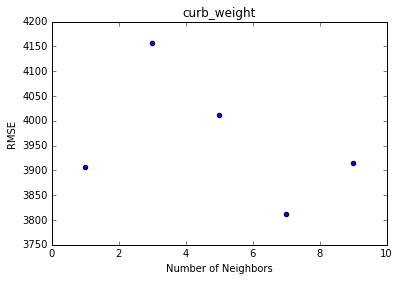

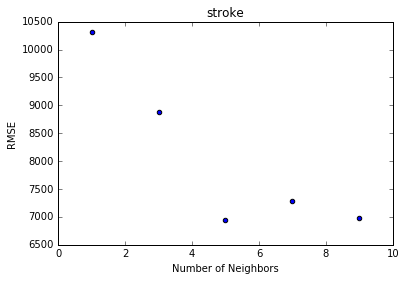

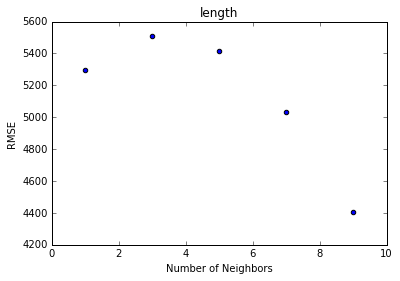

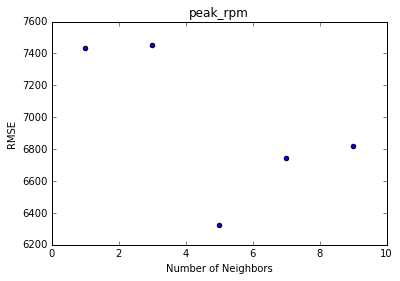

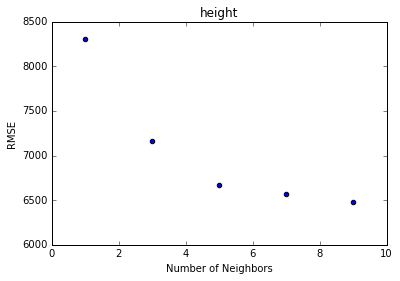

In [26]:
for col in univariate_knn:
    plt.figure()
    plt.scatter(k_values, univariate_knn[col])
    plt.xlabel('Number of Neighbors')
    plt.ylabel('RMSE')
    plt.title(col)

**Multivariate KNN Model**

In [27]:
def knn_train_test(df, train_cols, target_col_name):
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    num_train_samples = int(0.75*rand_df.shape[0])
    train_df = rand_df.iloc[:num_train_samples]
    test_df = rand_df.iloc[num_train_samples:]
    model = KNeighborsRegressor()
    model.fit(train_df[train_cols], train_df[target_col_name])
    preds = model.predict(test_df[train_cols])
    return np.sqrt(mean_squared_error(preds, test_df[target_col_name]))

We've modified `knn_train_test()` to accept a list of feature columns `train_cols` now.

Below, we'll take the avg RMSE values across each of the k values for each of the features tested in the univariate analysis and sort in increasing value of RMSE. We'll then fit a multivariate KNN model across the best two, three, four, and five features found for our multivariate KNN analysis.

In [28]:
feature_avg_rmse = {}
for k, v in univariate_knn.items():
    avg_rmse = np.mean(v)
    feature_avg_rmse[k] = avg_rmse
series_avg_rmse = pd.Series(feature_avg_rmse)
series_avg_rmse = series_avg_rmse.sort_values()

series_avg_rmse

    
    

engine_size           2913.984552
width                 3635.853430
wheel_base            3876.059055
curb_weight           3960.147487
city_mpg              4003.950230
highway_mpg           4394.793153
horsepower            4416.336170
length                5131.896083
compression_ratio     5988.485823
normalized_losses     6414.628999
peak_rpm              6955.553334
bore                  7005.432042
height                7036.577150
stroke                8078.044616
symboling            12160.748232
dtype: float64

In [29]:
best_two = ['engine_size', 'width']
best_three = ['engine_size', 'width', 'wheel_base']
best_four = ['engine_size', 'width', 'wheel_base', 'curb_weight']
best_five = ['engine_size', 'width', 'wheel_base', 'curb_weight', 'city_mpg']

In [30]:
multi_knn = {}
multi_knn['two best features'] = knn_train_test(normalized_cars, best_two, 'price')
multi_knn['three best features'] = knn_train_test(normalized_cars, best_three, 'price')
multi_knn['four best features'] = knn_train_test(normalized_cars, best_four, 'price')
multi_knn['five best features'] = knn_train_test(normalized_cars, best_five, 'price')

In [31]:
multi_knn

{'five best features': 2543.664238540805,
 'four best features': 2399.3737483588766,
 'three best features': 2634.3882310997487,
 'two best features': 2638.287274194467}

In [32]:
def knn_train_test(df, train_cols, target_col_name, k):
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    num_train_samples = int(0.75*rand_df.shape[0])
    train_df = rand_df.iloc[:num_train_samples]
    test_df = rand_df.iloc[num_train_samples:]
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(train_df[train_cols], train_df[target_col_name])
    preds = model.predict(test_df[train_cols])
    return np.sqrt(mean_squared_error(preds, test_df[target_col_name]))

In [33]:
k_values = list(range(1,26))

We'll now train the top three models from above with each k value from 1 to 25 to see what performs best.

In [34]:
top_three = [best_five, best_four, best_three]
multi_knn = {}
for m in top_three:
    if m == best_five:
        name = 'top five features'
    elif m == best_four:
        name = 'top four features'
    else:
        name = 'top three features'
    for k in k_values:
        if k == 1:
            multi_knn[name] = [knn_train_test(normalized_cars, m, 'price', k)]
        else:
            multi_knn[name].append(knn_train_test(normalized_cars, m, 'price', k))


In [35]:
multi_knn

{'top five features': [2198.1608310621145,
  2402.0308360333142,
  2516.6052483524027,
  2588.640862205569,
  2543.664238540805,
  2545.7763357011786,
  2606.406501591917,
  2815.318660567435,
  2785.46102051866,
  2771.8811967722586,
  2729.3198095110683,
  2794.67787774539,
  2832.9760174697294,
  2880.493075993126,
  3014.7527522086934,
  3101.6329287454873,
  3164.9325512141627,
  3240.472823936355,
  3262.111511430676,
  3320.7830101852924,
  3399.330393442633,
  3435.38692788332,
  3475.615751819248,
  3553.77592319236,
  3640.9329688473003],
 'top four features': [2054.308886219402,
  2312.1377161898145,
  2342.6297026519737,
  2297.287468833795,
  2399.3737483588766,
  2483.1128692111097,
  2655.597307504255,
  2753.481913222979,
  2869.211518068187,
  2876.2827368589724,
  2790.066817576287,
  2854.342162940999,
  2847.3193772453174,
  2946.704084275195,
  3085.1710150725858,
  3163.7708779795853,
  3275.6480420821645,
  3280.424683662215,
  3316.979218424875,
  3350.908416048

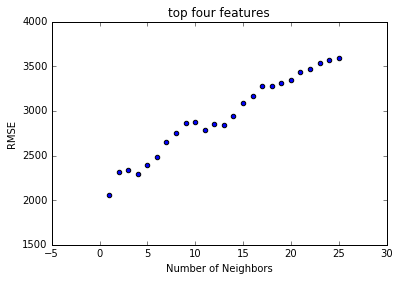

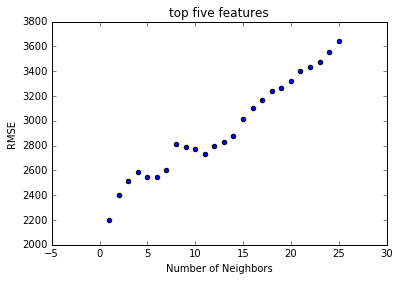

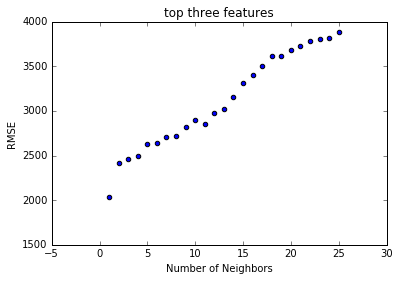

In [36]:
for name, v in multi_knn.items():
    plt.figure()
    plt.scatter(k_values, v)
    plt.xlabel('Number of Neighbors')
    plt.ylabel('RMSE')
    plt.title(name)